**Visualizing and Predicting Agricultural Production due to Population Migration and Climate Change**

Standard Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Start and End year to subset the data
start_yr = 1988
end_yr = 2018

World Population and Projection Dataset Exploration

In [ ]:
# Population Dataframe
pop_df = pd.read_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/Total_Population.csv')
pop_df.head()

,Country or Area,Year(s),Variant,Value
0,Afghanistan,2020,Medium,38928.346
1,Afghanistan,2019,Medium,38041.754
2,Afghanistan,2018,Medium,37171.921
3,Afghanistan,2017,Medium,36296.113
4,Afghanistan,2016,Medium,35383.032


In [ ]:
pop_df['Year(s)'].value_counts()

2015    285
1957    285
2019    285
1956    285
1972    285
       ... 
1994    285
2010    285
1963    285
1979    285
1952    285
Name: Year(s), Length: 71, dtype: int64

In [ ]:
# Average population per country from 1952-2015
pop_df.groupby(['Country or Area'])['Value'].mean()

Country or Area
Afghanistan       1.722678e+04
Africa            6.257469e+05
Albania           2.543363e+03
Algeria           2.337333e+04
American Samoa    3.997132e+01
                      ...     
Western Sahara    2.241426e+02
World             4.967283e+06
Yemen             1.272828e+04
Zambia            7.908552e+03
Zimbabwe          8.602377e+03
Name: Value, Length: 282, dtype: float64

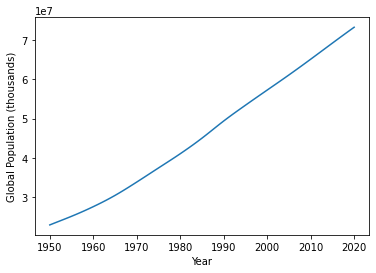

In [ ]:
# Global population by year Plot
plt.plot(pop_df.groupby(['Year(s)']).sum().index, pop_df.groupby(['Year(s)']).sum()['Value'])
plt.xlabel('Year')
plt.ylabel('Global Population (thousands)')
plt.show()

In [ ]:
# Extract subset of population form start_yr to end_yr
pop_df = pop_df[(pop_df['Year(s)']<=end_yr) & (pop_df['Year(s)']>=start_yr)]
pop_df.head()

,Country or Area,Year(s),Variant,Value
2,Afghanistan,2018,Medium,37171.921
3,Afghanistan,2017,Medium,36296.113
4,Afghanistan,2016,Medium,35383.032
5,Afghanistan,2015,Medium,34413.603
6,Afghanistan,2014,Medium,33370.794


In [ ]:
pop_df['Year(s)'].value_counts()

2015    285
2011    285
2000    285
2008    285
2016    285
1993    285
2001    285
2009    285
2017    285
1994    285
2002    285
2010    285
2018    285
1995    285
2003    285
1988    285
2007    285
1996    285
2004    285
2012    285
1989    285
1997    285
2005    285
2013    285
1990    285
1998    285
2006    285
2014    285
1991    285
1999    285
1992    285
Name: Year(s), dtype: int64

In [ ]:
pop_df['Country or Area']

2        Afghanistan
3        Afghanistan
4        Afghanistan
5        Afghanistan
6        Afghanistan
            ...     
20192       Zimbabwe
20193       Zimbabwe
20194       Zimbabwe
20195       Zimbabwe
20196       Zimbabwe
Name: Country or Area, Length: 8835, dtype: object

In [ ]:
# Global population by year
global_pop_df = pop_df.groupby(['Year(s)']).sum()
global_pop_df

,Value
Year(s),
1988,4.766333e+07
1989,4.854328e+07
1990,4.940299e+07
1991,5.023777e+07
1992,5.105034e+07
1993,5.184508e+07
1994,5.262963e+07
1995,5.340984e+07
1996,5.418667e+07


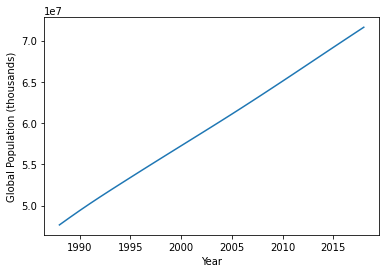

In [ ]:
# Global population by year Plot
plt.plot(global_pop_df.index, global_pop_df['Value'])
plt.xlabel('Year')
plt.ylabel('Global Population (thousands)')
plt.show()

**Cereal Trading Dataset Exploration**

In [ ]:
cereal_df = pd.read_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/cereal_trading.csv')
cereal_df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,"Wheat except durum wheat, and meslin",Export,3402.50,2000.0,Weight in kilograms,2000.0
1,Afghanistan,2018,Rye,Import,1200.69,0.0,No Quantity,0.0
2,Afghanistan,2018,Barley,Import,4601859.90,0.0,No Quantity,0.0
3,Afghanistan,2018,Grain sorghum,Export,372717.35,0.0,No Quantity,0.0
4,Afghanistan,2018,Cereals unmilled nes,Import,57967.29,32375.8,Weight in kilograms,32375.8
...,...,...,...,...,...,...,...,...
89932,Zimbabwe,1995,Buckwheat,Import,6004.00,28001.0,Weight in kilograms,28001.0
89933,Zimbabwe,1995,Millet,Import,189360.00,691875.0,Weight in kilograms,691875.0
89934,Zimbabwe,1995,Millet,Export,200584.00,644018.0,Weight in kilograms,644018.0
89935,Zimbabwe,1995,Cereals unmilled nes,Import,404.00,500.0,Weight in kilograms,500.0


In [ ]:
# Commodities
cereal_df['Commodity'].value_counts()

Rice, semi-milled or wholly milled      7746
Maize except seed corn                  7273
Rice, husked (brown)                    6622
Maize (corn) seed                       6313
Wheat except durum wheat, and meslin    6242
Cereals unmilled nes                    6176
Rice in the husk (paddy or rough)       5984
Rice, broken                            5966
Barley                                  5701
Durum wheat                             5692
Oats                                    5447
Millet                                  5007
Grain sorghum                           4555
Buckwheat                               3949
Canary seed                             3792
Rye                                     3472
Name: Commodity, dtype: int64

In [ ]:
# Years
cereal_df['Year'].unique()

array([2018, 2016, 2015, 2017, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 2019, 1991, 1990, 1989, 1988])

In [ ]:
# Trade flows
cereal_df['Flow'].value_counts()

Import       53130
Export       32632
Re-Export     3107
Re-Import     1068
Name: Flow, dtype: int64

In [ ]:
# Missing values for 'Weight in kilograms'
cereal_df['Quantity Name'].value_counts()

Weight in kilograms    88710
No Quantity             1227
Name: Quantity Name, dtype: int64

In [ ]:
# Note: The two columns don't match!
cereal_df['Quantity'].equals(cereal_df['Weight (kg)'])

False

In [ ]:
# Replace missing entries with np.nan
cereal_df.loc[cereal_df['Quantity Name'] ==  'No Quantity', ['Weight (kg)', 'Quantity']] = np.nan

# Drop "Quantity Name" and "Quantity" from dataframe
cereal_df.drop(["Quantity Name", "Quantity"], axis=1, inplace = True)
cereal_df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2018,"Wheat except durum wheat, and meslin",Export,3402.50,2000.0
1,Afghanistan,2018,Rye,Import,1200.69,NaN
2,Afghanistan,2018,Barley,Import,4601859.90,NaN
3,Afghanistan,2018,Grain sorghum,Export,372717.35,NaN
4,Afghanistan,2018,Cereals unmilled nes,Import,57967.29,32375.8


In [ ]:
cereal_df['Year'].unique()

array([2018, 2016, 2015, 2017, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 2019, 1991, 1990, 1989, 1988])

In [ ]:
cereal_df = cereal_df[(cereal_df['Year']<=end_yr) & (cereal_df['Year']>=start_yr)]
cereal_df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2018,"Wheat except durum wheat, and meslin",Export,3402.50,2000.0
1,Afghanistan,2018,Rye,Import,1200.69,NaN
2,Afghanistan,2018,Barley,Import,4601859.90,NaN
3,Afghanistan,2018,Grain sorghum,Export,372717.35,NaN
4,Afghanistan,2018,Cereals unmilled nes,Import,57967.29,32375.8


In [ ]:
# Group by year exports of rice only
global_rice_df = cereal_df[(cereal_df['Commodity'] == 'Rice, semi-milled or wholly milled')].groupby(['Year']).sum()
global_rice_df

,Trade (USD),Weight (kg)
Year,,
1988,5.606725e+08,1.180231e+09
1989,2.852290e+09,8.779120e+09
1990,2.216482e+09,6.596727e+09
1991,3.334339e+09,9.075675e+09
1992,4.677258e+09,1.321386e+10
1993,4.751998e+09,1.410172e+10
1994,7.055413e+09,1.715612e+10
1995,8.923375e+09,2.438000e+10
1996,9.980167e+09,2.330280e+10


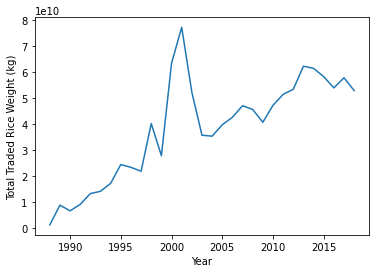

In [ ]:
# Rice Trade Weight (in kg) througout the years
plt.plot(global_rice_df.index, global_rice_df['Weight (kg)'])
plt.xlabel('Year')
plt.ylabel('Total Traded Rice Weight (kg)')
plt.savefig('trade_rice.png')
plt.show()

Simple Linear Regression Model


In [ ]:
# Predictor (Global Population)
X = global_pop_df['Value'].to_numpy().reshape(-1,1)
print(X.shape)
# Response (Rice Trade Weight)
Y = global_rice_df['Weight (kg)'].to_numpy().reshape(-1,1)
print(Y.shape)

(31, 1)
(31, 1)


In [ ]:
# Regression Model
reg_model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
reg_model.fit(X, Y)

# R-squared Value
r_sq = reg_model.score(X, Y)
print('coefficient of determination:', r_sq)

# Print the Intercept
print('intercept:', reg_model.intercept_)

# Print the Slope
print('slope:', reg_model.coef_) 

coefficient of determination: 0.668989413977118
intercept: [-9.69139839e+10]
slope: [[2265.49984883]]


In [ ]:
Y_pred = reg_model.predict(X)

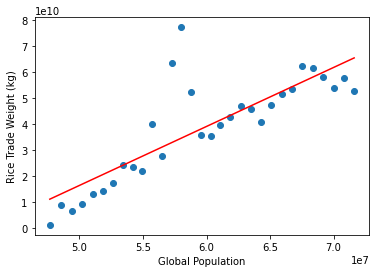

In [ ]:
plt.scatter(X, Y);
plt.plot(X, Y_pred, 'r');
plt.xlabel('Global Population')
plt.ylabel('Rice Trade Weight (kg)')
plt.savefig('pop_rice_LR.png')
plt.show()